In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

In [2]:
data = pd.read_csv('../Data/wiki_labels_with_not_offensive.csv')

In [3]:
len(data)

159563

In [4]:
data['not_offensive'].sum()

143338.0

In [5]:
len(data) - data['not_offensive'].sum()

16225.0

In [6]:
negative_impact, positive_impact = int(len(data) - data['not_offensive'].sum()), int(data['not_offensive'].sum())

negative_impact, positive_impact 

(16225, 143338)

In [7]:
test_jigsaw = pd.read_csv('../Data/jigsaw.test.csv')
test_jigsaw

,Unnamed: 0.1,Unnamed: 0,comment_text,toxicity,obscene,sexual_explicit,identity_attack,insult,threat,not_offensive
0,0,3,while arresting a man for resisting arrest.If ...,1.0,1.0,1.0,0.0,1.0,0.0,0.0
1,1,10,NO ! There are no alternative facts. Go check ...,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,11,the more you whine sore loser Artsterthe more ...,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,38,There's rarely opportunity to agree with Benne...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,42,The Law has every freedom to be an asss!,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
194423,194423,1997184,Herod's slaughter of the innocents in Matthew'...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194424,194424,1997187,You don't know that he would kill them if he c...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194425,194425,1997223,My son shouldn't have to be afraid during THOS...,0.0,0.0,0.0,0.0,0.0,0.0,1.0
194426,194426,1997226,Homosexuals are NOT pedophiles. The pedophiles...,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [8]:
jigsaw_not_offensive, offensive_content_jigsaw = int(test_jigsaw['not_offensive'].sum()), int(len(test_jigsaw) - test_jigsaw['not_offensive'].sum())

In [9]:
# Sample data for a tornado chart (positive and negative impacts on a central value)
tornado_data = {
    'Factors': ['Wiki Talk Labels', 'Jigsaw Civil Comments'],
    'Hateful Content': [-negative_impact, -offensive_content_jigsaw],
    'Not Offensive': [positive_impact, jigsaw_not_offensive]
}

# Convert the data into a pandas DataFrame
df = pd.DataFrame(tornado_data)
df

,Factors,Hateful Content,Not Offensive
0,Wiki Talk Labels,-16225,143338
1,Jigsaw Civil Comments,-15888,178540


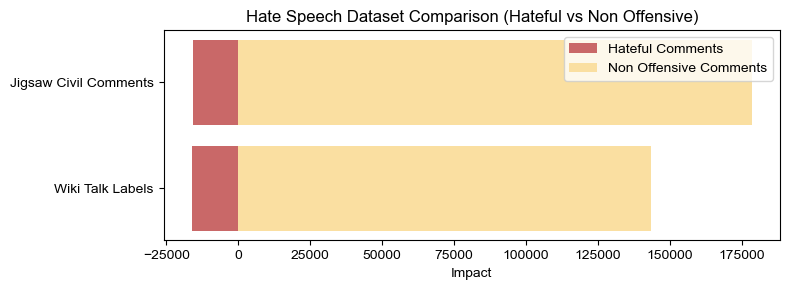

In [11]:
# Plotting the tornado chart
fig, ax = plt.subplots(figsize=(8, 3))

# Plot the Negative Impact bars on the left side
ax.barh(df['Factors'], df['Hateful Content'], color='#C96868', label='Hateful Comments')

# Plot the Positive Impact bars on the right side
ax.barh(df['Factors'], df['Not Offensive'], color='#FADFA1', label='Non Offensive Comments')

# Add labels and title
ax.set_xlabel('Impact')
ax.set_title('Hate Speech Dataset Comparison (Hateful vs Non Offensive)')

# Add grid and legend
ax.grid(False)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()